 **Upload Google Sheet from Google Drive**

To work with data stored in Google Sheets, we need to connect our Colab environment to Google Drive.

In [ ]:
from google.colab import auth
from google.auth import default
import gspread
import numpy as np

# Authenticate and create the PyDrive client
auth.authenticate_user()

# Connect to Google Sheets
gc = gspread.authorize(default()[0])

**Load Data from a Google Sheet**

In [ ]:
# Replace 'your_sheet_id' with your actual Google Sheet ID
sheet_id = '1FYWSF-unCRlU8N9vNC6297OmOgLY11xFm1KjJOOj34k'
sheet = gc.open_by_key(sheet_id)

# Select the first sheet (worksheet) in the Google Sheet
worksheet = sheet.get_worksheet(0)

# Convert the worksheet to a pandas DataFrame
import pandas as pd
data = pd.DataFrame(worksheet.get_all_records())

**Overview of the Data**

In [ ]:
# Display the first few rows of the DataFrame
data.head()

,Reg_no,Full Name,Status,Branch,Class ID,Hospital allocated,Internship Start Date,Internship End Date,Internship Status,Year
0,24-1628,Ann Shakilo,Student,Nakuru,Batch 4 2024 Morning_Nakuru,Valley Hospital,2024-11-25,22 Dec 2024,Ongoing,2024
1,24-1623,Grace Njeri Maina,Student,Nakuru,Batch 4 2024 Morning_Nakuru,ST. Mary Hospital,2024-11-25,22 Dec 2024,Ongoing,2024
2,24-1617,Faith Cheptoo Sawe,Student,Nakuru,Batch 4 2024 Morning_Nakuru,ST. Mary Hospital,2024-11-25,22 Dec 2024,Ongoing,2024
3,24-1615,Maureen Wangui,Student,Nakuru,Batch 4 2024 Morning_Nakuru,ST. Mary Hospital,2024-11-25,22 Dec 2024,Ongoing,2024
4,24-1612,Divon Johns,Student,Nairobi,Batch 5 2024 Morning_Nairobi,National Spinal Injury Referral Hospital,2024-11-25,22 Dec 2024,Ongoing,2024


**Data Visualization**

**Number of Student Internships per Hospital**

In [ ]:
import pandas as pd
import plotly.express as px

# Assuming `data` is your dataframe
# Group the data by 'Branch' and 'Hospital' and count the number of students
student_counts = data.groupby(['Branch', 'Hospital allocated'])['Reg_no'].count().reset_index()
student_counts.rename(columns={'Reg_no': 'Number of Students'}, inplace=True)

# Create the interactive bar plot
fig = px.bar(
    student_counts,
    x='Hospital allocated',
    y='Number of Students',
    color='Branch',
    barmode='group',  # Groups bars by branch
    title='Number of Students per Hospital Allocated (Grouped by Branch)',
    labels={'Hospital allocated': 'Hospital', 'Number of Students': 'Number of Students'},
    hover_data=['Branch', 'Hospital allocated', 'Number of Students']
)

# Update the layout for better readability
fig.update_layout(
    xaxis_title='Hospital',
    yaxis_title='Number of Students',
    legend_title='Branch',
    xaxis=dict(tickangle=45),  # Rotates x-axis labels
    margin=dict(l=40, r=40, t=60, b=100),  # Adjusts margins for better layout
)

# Show the plot
fig.show()


**Number of Hospital Internships per Branch**

In [ ]:
import plotly.express as px

# Group the data by 'Branch' and count the occurrences
branch_counts = data.groupby('Branch')['Branch'].count().reset_index(name='Internship Count')

# Create the bar plot
fig = px.bar(
    branch_counts,
    x='Branch',
    y='Internship Count',
    title='Number of Internships per Branch',
    labels={'Branch': 'Branch', 'Internship Count': 'Number of Internships'},
    color='Branch',
)

fig.update_layout(xaxis_title='Branch', yaxis_title='Number of Internships')
fig.show()

**Number of Students per Class ID**

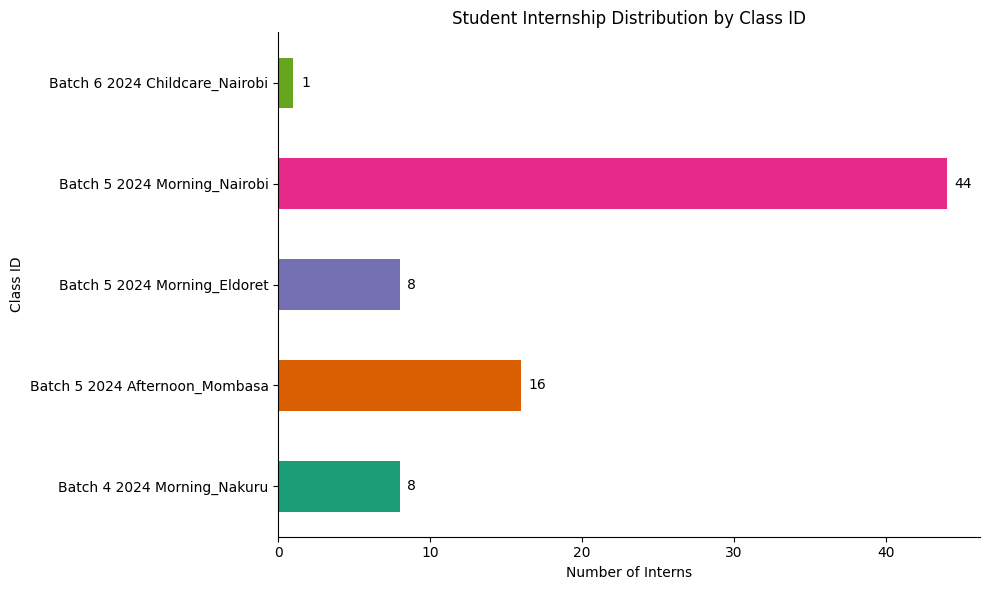

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns

# Group the data and plot the horizontal bar chart
ax = data.groupby('Class ID').size().plot(
    kind='barh',
    color=sns.palettes.mpl_palette('Dark2'),
    figsize=(10, 6)
)

# Add data labels to each bar
for bar in ax.patches:
    plt.text(
        bar.get_width() + 0.5,  # Position the label slightly to the right of the bar
        bar.get_y() + bar.get_height() / 2,  # Center the label vertically on the bar
        int(bar.get_width()),
        va='center',
        ha='left',
        fontsize=10
    )

# Customize the plot
plt.gca().spines[['top', 'right']].set_visible(False)
plt.xlabel('Number of Interns')  # X-axis label
plt.ylabel('Class ID')  # Y-axis label
plt.title('Student Internship Distribution by Class ID')  # Title
plt.tight_layout()
plt.show()
